## Loading the '.mat' Files

##### Start by loading the '.mat' files using 'scipy.io.loadmat':

In [15]:
import scipy.io

# Load the .mat file
data_s1 = scipy.io.loadmat('../dataset/S1.mat')
data_s2 = scipy.io.loadmat('../dataset/S2.mat')

## Inspecting the Data Structure

##### Inspect the keys of the loaded .mat file to see what data is available:

In [16]:
# Inspect the keys in the loaded data
print("Keys in S1.mat:", list(data_s1.keys()))
# print("\nKeys in S2.mat:", list(data_s2.keys()))

Keys in S1.mat: ['__header__', '__version__', '__globals__', 'training_data', 'test_data', 'Info']


## Exploring specific Keys

##### Diving deeper into specific parts of the data, like Info or training_data, by accessing these keys:

In [17]:
# Explore 'Info' key
s1_info_data = data_s1['Info']
s2_info_data = data_s2['Info']

# Print the type and shape for 'info' key in s1
print("Info type s1:", type(s1_info_data))
print("Info content shape s1:", s1_info_data.shape)

# Print the type and shape for 'info' key in s2
print("\nInfo type s2:", type(s2_info_data))
print("Info content shape s2:", s2_info_data.shape)


# Explore the 'training_data' key
s1_training_data = data_s1['training_data']
s2_training_data = data_s2['training_data']

# Print the type and shape for the 'training_data' key in s1
print("\nTraining data type for s1:", type(s1_training_data))
print("Training data shape for s1:", s1_training_data.shape)

# Print the type and shape for the 'training_data' key in s2
print("\nTraining data type for s2:", type(s2_training_data))
print("Training data shape for s2:", s2_training_data.shape)



Info type s1: <class 'numpy.ndarray'>
Info content shape s1: (1, 1)

Info type s2: <class 'numpy.ndarray'>
Info content shape s2: (1, 1)

Training data type for s1: <class 'numpy.ndarray'>
Training data shape for s1: (1, 4)

Training data type for s2: <class 'numpy.ndarray'>
Training data shape for s2: (1, 4)


## Accessing Detailed Information

##### To get more detailed information from these arrays, we might need to access specific elements

In [18]:
# Accessing and displaying the first element in 'Info'
s1_info_content = s1_info_data[0, 0]
s2_info_content = s2_info_data[0, 0]
print("Fields in s1 'Info':", s1_info_content.dtype.names)
print("Fields in s2 'Info':", s2_info_content.dtype.names)

# Accessing and displaying the shape of elements in 'training_data'
s1_training_shapes = [element.shape for element in s1_training_data[0]]
s2_training_shapes = [element.shape for element in s2_training_data[0]]
print("\nShapes of elements in s1 'training_data':", s1_training_shapes)
print("Shapes of elements in s2 'training_data':", s2_training_shapes)


Fields in s1 'Info': ('Task', 'SampleRate', 'Filter', 'MEGChannelsSpec', 'MEGChannelPosition', 'TimeInSec', 'TimeComment', 'NumberOfClasses', 'ClassLabelForTrainingData', 'TrainingDataStructure', 'TestDataStructure', 'Remark')
Fields in s2 'Info': ('Task', 'SampleRate', 'Filter', 'MEGChannelsSpec', 'MEGChannelPosition', 'TimeInSec', 'TimeComment', 'NumberOfClasses', 'ClassLabelForTrainingData', 'TrainingDataStructure', 'TestDataStructure', 'Remark')

Shapes of elements in s1 'training_data': [(40, 400, 10), (40, 400, 10), (40, 400, 10), (40, 400, 10)]
Shapes of elements in s2 'training_data': [(40, 400, 10), (40, 400, 10), (40, 400, 10), (40, 400, 10)]



---

## Visualizing the Data

##### Visualization using `matplotlib` for 3D numerical data

Since the data is 3-dimensional, we use `matplotlib` to create 3D plots. This allows us to effectively visualize the spatial relationships and patterns within the data. For instance, we can plot 3D surfaces to represent the data across different dimensions or visualize specific slices of the 3D array.

---

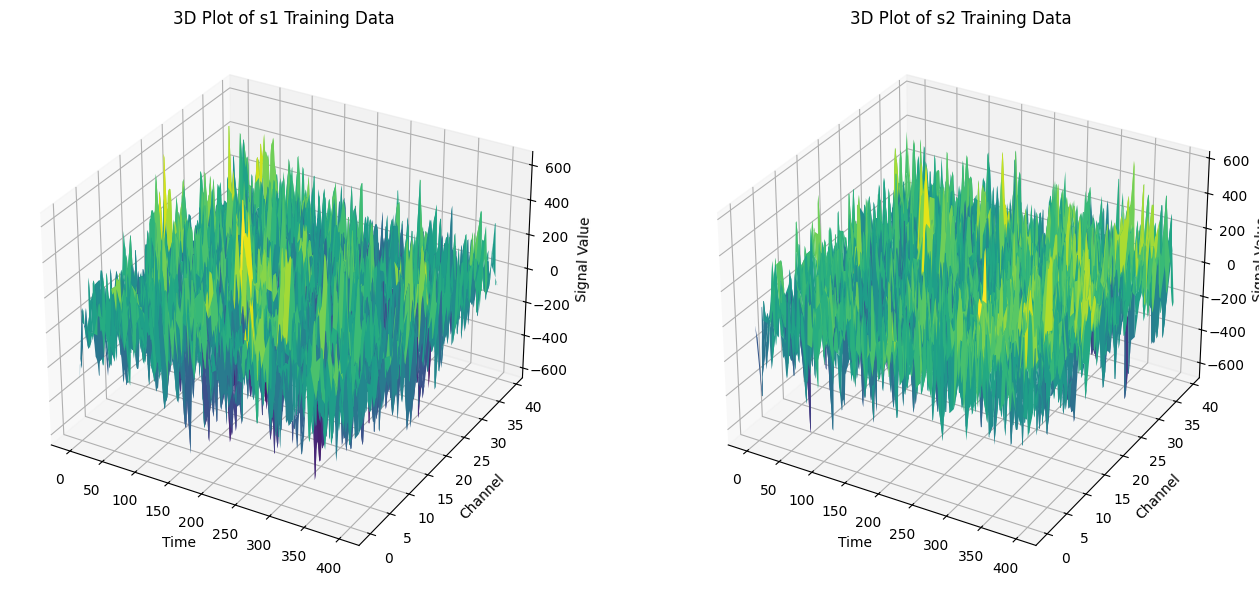

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Access a specific 2D slice from the 3D training data
example_data_s1 = s1_training_data[0][0]  # Shape: (40, 400, 10) - choose the first 2D slice
example_data_s2 = s2_training_data[0][0]  # Shape: (40, 400, 10) - choose the first 2D slice

# Select a specific 2D slice (e.g., the first slice along the last dimension)
slice_index = 0
data_s1_slice = example_data_s1[:, :, slice_index]  # Shape: (40, 400)
data_s2_slice = example_data_s2[:, :, slice_index]  # Shape: (40, 400)

# Create a meshgrid for plotting
x = np.arange(data_s1_slice.shape[1])
y = np.arange(data_s1_slice.shape[0])
X, Y = np.meshgrid(x, y)

# Plot the 3D surface for the s1 training data slice
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, data_s1_slice, cmap='viridis')
ax1.set_title('3D Plot of s1 Training Data')
ax1.set_xlabel('Time')
ax1.set_ylabel('Channel')
ax1.set_zlabel('Signal Value')

# Plot the 3D surface for the s2 training data slice
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, data_s2_slice, cmap='viridis')
ax2.set_title('3D Plot of s2 Training Data')
ax2.set_xlabel('Time')
ax2.set_ylabel('Channel')
ax2.set_zlabel('Signal Value')

plt.tight_layout()
plt.show()
